In [35]:
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn 
import statsmodels.api as sm
import sklearn.cross_validation
import patsy 


In [36]:
affairdata=sm.datasets.fair.load_pandas().data
affairdata['affair']=(affairdata.affairs>0).astype(int)

In [37]:
affairdata.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [38]:
affairdata.groupby("affair").mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


In [39]:
affairdata.groupby("rate_marriage").mean()

,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
rate_marriage,,,,,,,,,
1.0,33.823232,13.914141,2.308081,2.343434,13.848485,3.232323,3.838384,1.201671,0.747475
2.0,30.471264,10.727011,1.735632,2.330460,13.864943,3.327586,3.764368,1.615745,0.635057
3.0,30.008056,10.239174,1.638469,2.308157,14.001007,3.402820,3.798590,1.371281,0.550856
4.0,28.856601,8.816905,1.369536,2.400981,14.144514,3.420161,3.835861,0.674837,0.322926
5.0,28.574702,8.311662,1.252794,2.506334,14.399776,3.454918,3.892697,0.348174,0.181446


Text(0,0.5,'Frequency')

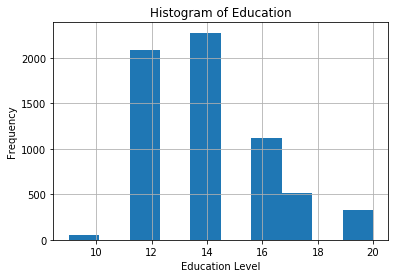

In [40]:
affairdata.educ.hist()
plt.title('Histogram of Education')
plt.xlabel('Education Level')
plt.ylabel('Frequency')

Text(0,0.5,'Frequency')

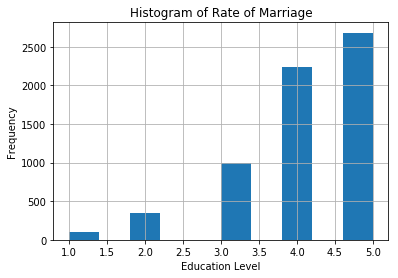

In [41]:
affairdata.rate_marriage.hist()
plt.title('Histogram of Rate of Marriage')
plt.xlabel('Education Level')
plt.ylabel('Frequency')

Text(0,0.5,'Frequency')

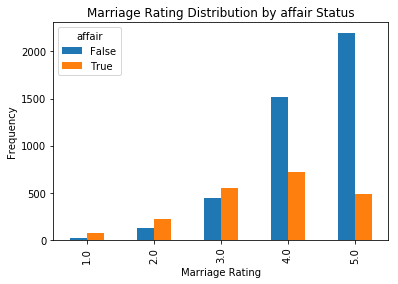

In [42]:
pd.crosstab(affairdata.rate_marriage,affairdata.affair.astype(bool)).plot(kind='Bar')
plt.title('Marriage Rating Distribution by affair Status')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')

Text(0,0.5,'Percentage')

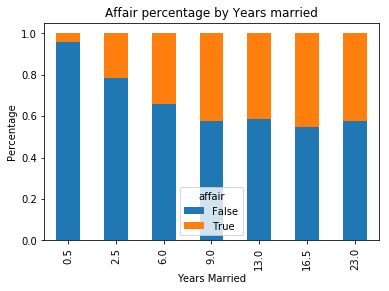

In [43]:
affair_yrs_married=pd.crosstab(affairdata.yrs_married,affairdata.affair.astype(bool))
affair_yrs_married.div(affair_yrs_married.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.title('Affair percentage by Years married')
plt.xlabel('Years Married')
plt.ylabel('Percentage')

In [46]:
y, X =patsy.dmatrices('affair~rate_marriage + age + yrs_married + children + \
religious + educ + C(occupation) + C(occupation_husb)',
affairdata, return_type="dataframe" )


print(X.columns)


Index(['Intercept', 'C(occupation)[T.2.0]', 'C(occupation)[T.3.0]',
       'C(occupation)[T.4.0]', 'C(occupation)[T.5.0]', 'C(occupation)[T.6.0]',
       'C(occupation_husb)[T.2.0]', 'C(occupation_husb)[T.3.0]',
       'C(occupation_husb)[T.4.0]', 'C(occupation_husb)[T.5.0]',
       'C(occupation_husb)[T.6.0]', 'rate_marriage', 'age', 'yrs_married',
       'children', 'religious', 'educ'],
      dtype='object')


In [48]:
y=np.ravel(y)

In [76]:
#fixing column names of X
X = X.rename(columns = {'C(occupation)[T.2.0]':'occ_2',
                        'C(occupation)[T.3.0]':'occ_3',
                        'C(occupation)[T.4.0]':'occ_4',
                        'C(occupation)[T.5.0]':'occ_5',
                        'C(occupation)[T.6.0]':'occ_6',
                        'C(occupation_husband)[T.2.0]':'occ_husb_2',
                        'C(occupation_husband)[T.3.0]':'occ_husb_3',
                        'C(occupation_husband)[T.4.0]':'occ_husb_4',
                        'C(occupation_husband)[T.5.0]':'occ_husb_5',
                        'C(occupation_husband)[T.6.0]':'occ_husb_6'})

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
model = LogisticRegression()
model.fit(X,y)
model.score(X,y)

0.7258875274897895

In [52]:
y.mean()

0.3224945020420987

In [54]:
#Let's examine the coefficients to see what we learn-
pd.DataFrame(list(zip(X.columns,np.transpose(model.coef_))))

,0,1
0,Intercept,[1.489835891324933]
1,C(occupation)[T.2.0],[0.18806639024440983]
2,C(occupation)[T.3.0],[0.4989478668156914]
3,C(occupation)[T.4.0],[0.25066856498524825]
4,C(occupation)[T.5.0],[0.8390080648117001]
5,C(occupation)[T.6.0],[0.8339084337443315]
6,C(occupation_husb)[T.2.0],[0.1906359445867889]
7,C(occupation_husb)[T.3.0],[0.2978327129263421]
8,C(occupation_husb)[T.4.0],[0.1614088540760616]
9,C(occupation_husb)[T.5.0],[0.18777091388972483]


In [56]:
X_train, X_test, y_train, y_test = sklearn.cross_validation.train_test_split(X, y,test_size = 0.33, random_state = 0)

In [57]:
model2 = LogisticRegression()
model2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [58]:
Y_pred = model2.predict(X_test)

In [59]:
print(Y_pred)

[1. 0. 0. ... 1. 0. 0.]


In [60]:
probs=model2.predict_proba(X_test)
print(probs)

[[0.35971898 0.64028102]
 [0.9113173  0.0886827 ]
 [0.72671132 0.27328868]
 ...
 [0.35251605 0.64748395]
 [0.6107136  0.3892864 ]
 [0.62412678 0.37587322]]


In [63]:
print(sklearn.metrics.confusion_matrix(y_test,Y_pred))
print(sklearn.metrics.classification_report(y_test,Y_pred))

[[1275  139]
 [ 427  260]]
             precision    recall  f1-score   support

        0.0       0.75      0.90      0.82      1414
        1.0       0.65      0.38      0.48       687

avg / total       0.72      0.73      0.71      2101



In [68]:
scores=sklearn.cross_validation.cross_val_score(LogisticRegression(),X,y,scoring="accuracy",cv=10)
print(scores)
print(scores.mean())

[0.72100313 0.70219436 0.73824451 0.70597484 0.70597484 0.72955975
 0.7327044  0.70440252 0.75157233 0.75      ]
0.7241630685514876


In [77]:
model.predict_proba(np.array([[1,0,0,1,0,0,1,0,0,0,0,3,25,3,1,4,16]]))

array([[0.77472221, 0.22527779]])